In [7]:
import os
import pandas as pd
cwd = os.path.abspath('') 
files = os.listdir(cwd)  

In [8]:
res1 = pd.DataFrame()
res2 = pd.DataFrame()
res3 = pd.DataFrame()
for file in files:                         
    if file.endswith('.xlsx'):
        excel_file = pd.ExcelFile(file)
        sheets = excel_file.sheet_names
        for sheet in sheets:               
            if(sheet.startswith('Detail_67_')):
                df = excel_file.parse(sheet_name = sheet)
                res1 = res1.append(df)
            if(sheet.startswith('DetailVol_67_')):
                df = excel_file.parse(sheet_name = sheet)
                res2 = res2.append(df)
            if(sheet.startswith('DetailTemp_67_')):
                df = excel_file.parse(sheet_name = sheet)
                res3 = res3.append(df)
res1.to_csv('detail.csv',index=False)
res2.to_csv('detailVol.csv',index=False)
res3.to_csv('detailTemp.csv',index=False)

In [9]:
import numpy as np

In [41]:
det_csv = pd.read_csv("detail.csv",parse_dates=['Relative Time(h:min:s.ms)'], 
    index_col=['Relative Time(h:min:s.ms)'])
min1=det_csv.resample('60S')
df.to_csv(path_or_buf="detailDownsampled.csv",index=False)

In [42]:
det_csv = pd.read_csv("detailVol.csv",parse_dates=['Relative Time(h:min:s.ms)'], 
    index_col=['Relative Time(h:min:s.ms)'])
min1=det_csv.resample('60S')
df.to_csv(path_or_buf="detailVolDownsampled.csv",index=False)

In [40]:
det_csv = pd.read_csv("detailTemp.csv",parse_dates=['Relative Time(h:min:s.ms)'], 
    index_col=['Relative Time(h:min:s.ms)'])
min1=det_csv.resample('60S')
df.to_csv(path_or_buf="detailTempDownsampled.csv",index=False)

In [2]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt,freqz
from sklearn import *
from sklearn.metrics import f1_score
import time
import datetime
from sklearn.model_selection import KFold
train = pd.read_csv("detailVolDownsampled.csv")

In [3]:
batch_size = 500000
num_batches = 10
res = 1000 # Resolution of signal plots

fs = 10000       # sample rate, 10kHz
nyq = 0.5 * fs  # Nyquist Frequency
cutoff_freq_sweep = range(250,4750,50) # Sweeping from 250 to 4750 Hz for SNR measurement
lpf_cutoff = 600

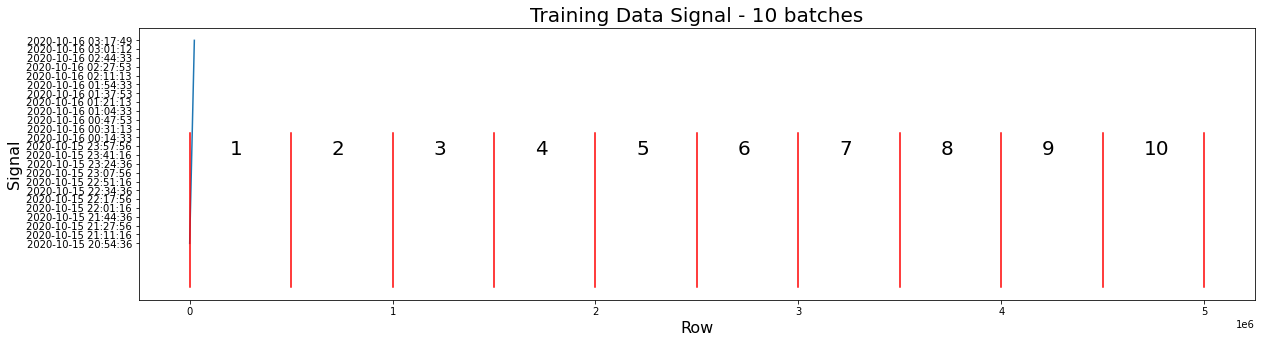

In [12]:
plt.figure(figsize=(20,5));
plt.plot(range(0,train.shape[0],res),train.Realtime[0::res])
for i in range(num_batches+1): 
    plt.plot([i*batch_size,i*batch_size],[-5,12.5],'r')
for j in range(num_batches): 
    plt.text(j*batch_size+200000,num_batches,str(j+1),size=20)
plt.xlabel('Row',size=16)
plt.ylabel('Signal',size=16)
plt.title('Training Data Signal - 10 batches',size=20)
plt.show()

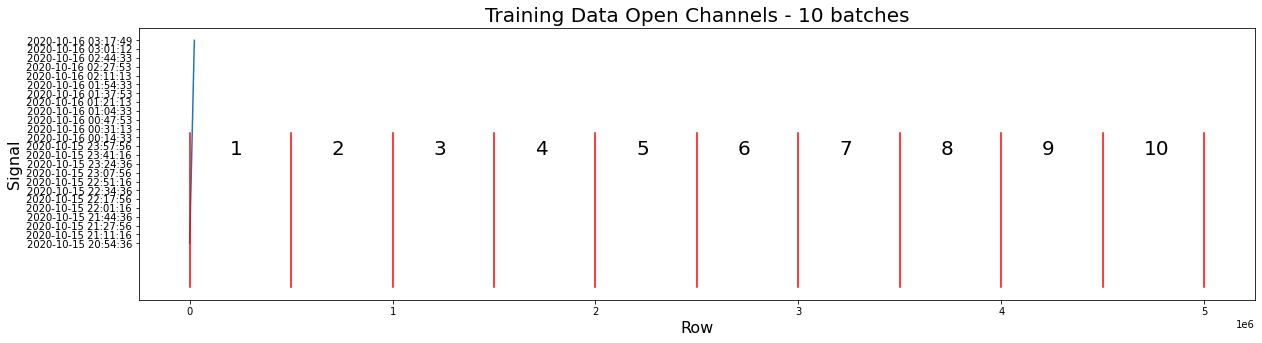

In [14]:
plt.figure(figsize=(20,5));
plt.plot(range(0,train.shape[0],res),train.Realtime[0::res])
for i in range(num_batches+1): plt.plot([i*batch_size,i*batch_size],[-5,12.5],'r')
for j in range(num_batches): plt.text(j*batch_size+200000,num_batches,str(j+1),size=20)
plt.xlabel('Row',size=16); plt.ylabel('Signal',size=16); 
plt.title('Training Data Open Channels - 10 batches',size=20)
plt.show()